<a href="https://colab.research.google.com/github/shauryanegi/zero-to-mastery-ml/blob/master/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in the front.

## Get the data

The images we're working with are from Food101 dataset. (101 different classes of food):

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

https://www.kaggle.com/dansbecker/food-101

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-28 06:20:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  41.3MB/s    in 2.5s    

2021-07-28 06:20:54 (41.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a CV project, this means visualizing the data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

## To visualize our images, first let's get the class names programatically.

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

🤔 Note: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize.

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


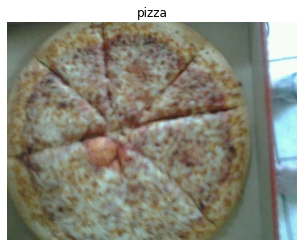

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [10]:
# View the img (actually just a big array/tensor)
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 59,  61,  47],
        [ 58,  60,  46],
        [ 57,  59,  46],
        ...,
        [247, 252, 246],
        [247, 252, 246],
        [247, 252, 246]],

       [[ 55,  57,  43],
        [ 55,  57,  43],
        [ 54,  56,  43],
        ...,
        [247, 252, 246],
        [247, 252, 246],
        [247, 252, 246]],

       [[ 53,  55,  41],
        [ 52,  54,  41],
        [ 52,  54,  41],
        ...,
        [247, 252, 246],
        [247, 252, 246],
        [247, 252, 246]],

       ...,

       [[ 69,  81,  67],
        [ 67,  79,  65],
        [ 64,  76,  62],
        ...,
        [159, 237, 250],
        [161, 239, 251],
        [165, 241, 254]],

       [[ 68,  80,  68],
        [ 68,  80,  68],
        [ 66,  78,  64],
        ...,
        [157, 235, 248],
        [160, 238, 250],
        [164, 242, 254]],

       [[ 68,  80,  70],
        [ 68,  80,  68],
        [ 67,  79,  67],
        ...,
        [155, 233, 24

In [11]:
 # View the image shape
 img.shape

(384, 512, 3)

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [12]:
# Get all the pixel values between 0 and 1
#img = img/255.

## An end-to-end example

Let's build a CNN to find patterns in our images, more specefically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Fit the CNN to our training data.

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,  # number of images to process at a time
    target_size=(224, 224),  # convert all images to be 224 x 224
    class_mode="binary",  # type of problem we're working on
    seed=42,
)

valid_data = valid_datagen.flow_from_directory(
    test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42
)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=10,
            kernel_size=3,  # can also be (3, 3)
            activation="relu",
            input_shape=(224, 224, 3),
        ),  # first layer specifies input shape (height, width, colour channels)
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(
            pool_size=2, padding="valid"  # pool_size can also be (2, 2)
        ),  # padding can also be 'same'
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(
            10, 3, activation="relu"
        ),  # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid"),  # binary activation output
    ]
)

# Compile the model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 258ms/step - loss: 0.5617 - accuracy: 0.7040 - val_loss: 0.4919 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4226 - accuracy: 0.8060 - val_loss: 0.3424 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4009 - accuracy: 0.8233 - val_loss: 0.3124 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3699 - accuracy: 0.8367 - val_loss: 0.3947 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3583 - accuracy: 0.8433 - val_loss: 0.3651 - val_accuracy: 0.8400


🤔 Note: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

In [14]:
# Get a summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.
The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 0.7730 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Despite having more parameters than our CNN (model_1), model_2 performs terribly.

In [17]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#2 Compile your model 
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

#3. Fit out model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 51.1440 - accuracy: 0.5473 - val_loss: 1.3845 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.8168 - accuracy: 0.6633 - val_loss: 0.6042 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5739 - accuracy: 0.7227 - val_loss: 0.7021 - val_accuracy: 0.6100
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5474 - accuracy: 0.7320 - val_loss: 0.4821 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.5025 - accuracy: 0.7627 - val_loss: 0.4595 - val_accuracy: 0.8000


In [18]:
# Get a summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

Binary classification: Let's break it down
We just went through a whirlwind of steps:

Become one with the data (visualize, visualize, visualize...)
Preprocess the data (prepare it for a model)
Create a model (start with a baseline)
Fit the model
Evaluate the model
Adjust different parameters and improve model (try to beat your baseline)
Repeat until satisfied
Let's step through each.

1. Import and become one with the data
Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

📖 Resource: To see how this data was processed into the file format we're using, see the preprocessing notebook.

If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary classification : Let's break it down

1. Become one with data
2. Preprocess the data (prepared for the model, the main step here was scaling/normalization and turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different models and improve the model (try to beat our baseline)
7. Repeat until satisfied. (Experiment, Experiment, Experiment)

## Visualize data

1. Become one with the data

Image shape: (307, 512, 3)
Image shape: (512, 382, 3)


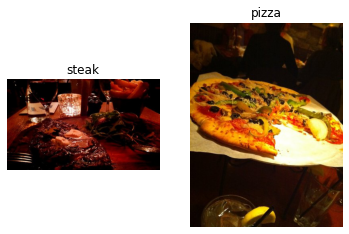

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess data (prepare it for a model)

In [21]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of data. Rather than look at all ~10000 images at one time, our model might look at only 32 at a time.

Does this for a couple of reasons:
1. 10000 (or more) images might not fit in the memory of our GPU.
2. Trying to learn patterns in 10000 images in one hit could result in the model not being able to learn very well.
3. Why 32? (Yann LeCun)

In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,  # Target directory
                                               target_size= (224,224), # Target size of images (height,width)
                                               class_mode = 'binary',
                                               batch_size = 32) # Size of minibatch

test_data = test_datagen.flow_from_directory(directory= test_dir,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

3. Create a model (start with a baseline)
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

🔑 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [25]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([  # The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
  Conv2D(filters=10, # these are the number of "feature extractors" that will be moving over our images.
         kernel_size=3, # the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
         strides=1, #  the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. 
         padding='valid', # this can be either 'same' or 'valid'
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

📖 Resources: For a great demonstration of these in action, be sure to spend some time going through the following:

CNN Explainer Webpage - a great visual overview of many of the concepts we're replicating here with code.
A guide to convolutional arithmetic for deep learning - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
For a great explanation of padding, see this Stack Overflow answer.
Now our model is ready, let's compile it.

In [27]:
#3. Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

##Summary of model



In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [29]:
## Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [30]:
## 4. Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 13s 250ms/step - loss: 1.1498 - accuracy: 0.6553 - val_loss: 0.4206 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.4943 - accuracy: 0.7793 - val_loss: 0.4383 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3918 - accuracy: 0.8360 - val_loss: 0.3804 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 12s 245ms/step - loss: 0.2703 - accuracy: 0.9013 - val_loss: 0.4374 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.1129 - accuracy: 0.9640 - val_loss: 0.4644 - val_accuracy: 0.7960


In [31]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.3651 - accuracy: 0.8400


[0.36506587266921997, 0.8399999737739563]

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Evaluating our model

It looks like our model is learning something. Let us evaluate it.

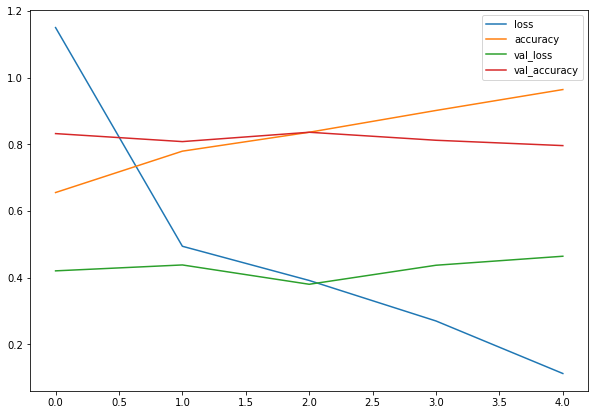

In [34]:
# Let us plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7));

In [35]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.legend();


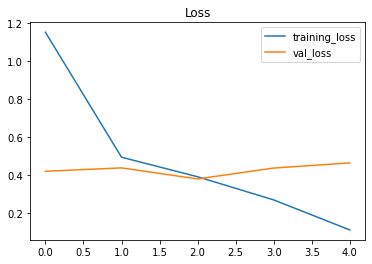

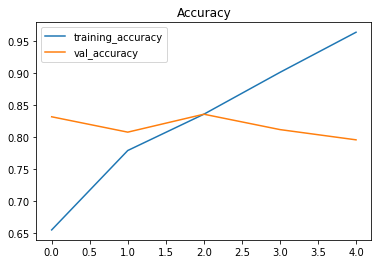

In [36]:
# Check the loss and accuracy of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

## How to Reduce Overfitting?

## Adjust the model parameters

Fitting a machine learning model

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to reduce overfitting:

* Increase the number of conv layers
* Increase the number of filters
* Add another Dense layer to the output of our flattened layer
* Add data augmentation
* Add regularisation layers (such as MaxPool2D)
* Add more data

In [37]:
# Create the model (This is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.6227 - accuracy: 0.6560 - val_loss: 0.5061 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5056 - accuracy: 0.7587 - val_loss: 0.3875 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4521 - accuracy: 0.7967 - val_loss: 0.3817 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4034 - accuracy: 0.8213 - val_loss: 0.3477 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3968 - accuracy: 0.8253 - val_loss: 0.3452 - val_accuracy: 0.8680


In [40]:
# Get the summary of the model
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

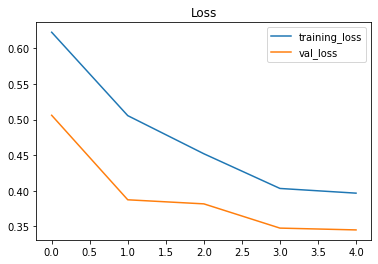

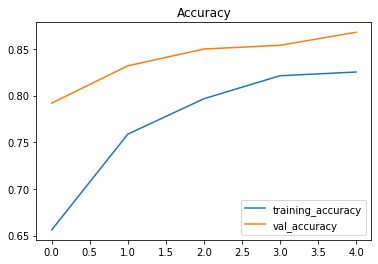

In [41]:
# Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and using data augmentation



In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augnmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

🤔 Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [43]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


🔑 Note: Data augmentation is usually only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [44]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels are not augmented

Showing image number: 0
Augmented image number: 0


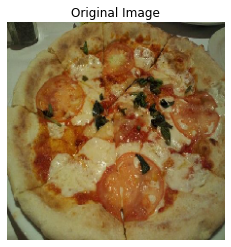

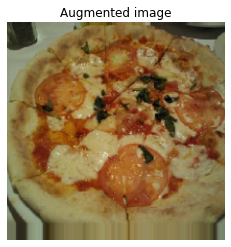

In [45]:
# Show original image and augmented images
import random
random_number = random.randint(0,32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
print(f"Augmented image number: {random_number}")
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Let's see what happens when we shuffle the augmented training data.



In [46]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6983 - accuracy: 0.4780 - val_loss: 0.6808 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 25s 537ms/step - loss: 0.7196 - accuracy: 0.4267 - val_loss: 0.6764 - val_accuracy: 0.5920
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6659 - accuracy: 0.6540 - val_loss: 0.6768 - val_accuracy: 0.5740
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.7009 - accuracy: 0.5560 - val_loss: 0.6207 - val_accuracy: 0.6660
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6402 - accuracy: 0.6473 - val_loss: 0.5126 - val_accuracy: 0.7740


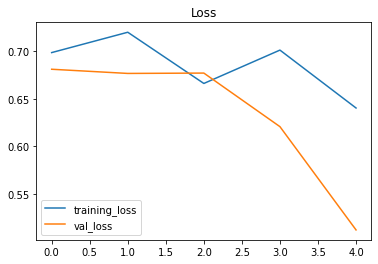

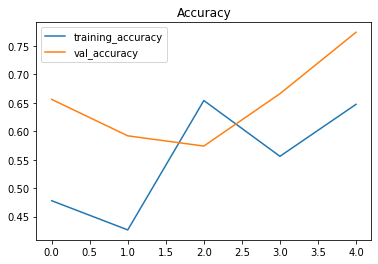

In [47]:
# Check our models training curves.
plot_loss_curves(history_6)

Let's shuffle our augmented training data (the same as before) and see what happens

In [48]:
# Import data, augment it and shuffle it.
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            class_mode = 'binary',
                                                                            batch_size = 32,
                                                                            shuffle= True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [49]:
# Create the model same as model 5 and model 6

# Create the model (same as model_5)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6540 - accuracy: 0.6100 - val_loss: 0.6278 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.5831 - accuracy: 0.6827 - val_loss: 0.4237 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 25s 542ms/step - loss: 0.5208 - accuracy: 0.7347 - val_loss: 0.3674 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4720 - accuracy: 0.7787 - val_loss: 0.3352 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 25s 536ms/step - loss: 0.4696 - accuracy: 0.7927 - val_loss: 0.3494 - val_accuracy: 0.8500


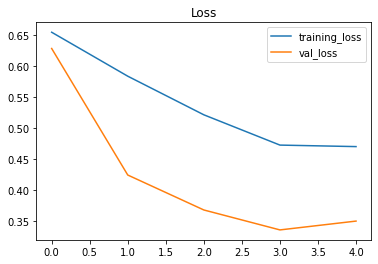

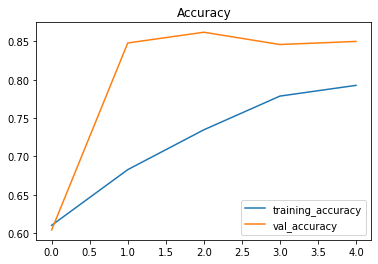

In [50]:
# Plot the model
plot_loss_curves(history_7)

## 7. Repeat until satisfied

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

Increase the number of model layers (e.g. add more convolutional layers).

Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).

Train for longer (more epochs).

Finding an ideal learning rate.

Get more data (give the model more opportunities to learn).
Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).

## Making a prediction with our trained model on custom data

In [51]:
# Class we're working with
print(class_names)

['.DS_Store' 'pizza' 'steak']


--2021-07-28 06:30:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-07-28 06:30:43 (25.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



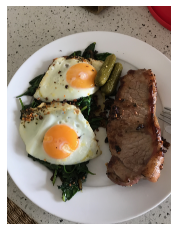

In [52]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

** Note: ** When you train a neural network and you want to make a prediction with it on your custom data, it is important than your custom data (or new data) is preprocessed into the same format as data your model is trained on.

In [54]:
# Create a function to import and image and resize it:
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshape it into (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [55]:
# Load in and preprocess our image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [57]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

array([[0.91748786]], dtype=float32)

#Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

In [60]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [65]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

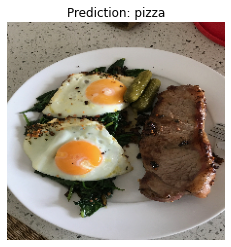

In [66]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2021-07-28 07:18:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-07-28 07:18:10 (33.5 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



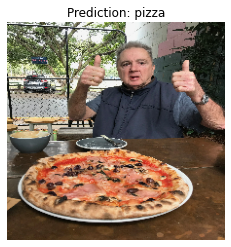

In [68]:
# Let us try on another image
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline
4. Fit a model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust hyperparameters (Beat baseline/reduce overfitting)
7. Repeat until satisfied

# 1. Import and become one with the data

In [69]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-07-28 07:26:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   139MB/s    in 3.8s    

2021-07-28 07:26:07 (130 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [74]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [76]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [78]:
# Let's get the subdirectories (these are our class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


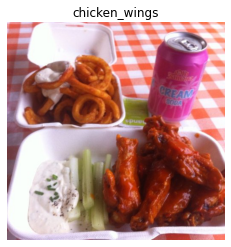

In [83]:
# Visualize! Visulaize! Visualize!
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size= (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model(start with a baseline)

We have been talking about the CNN explainer website. How about we just take their model and use it for our problem?

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation, BatchNormalization

# 1. Create our model
model_8 = Sequential([
                      Conv2D(filters = 10, kernel_size = 3, input_shape = (224,224,3)),
                      Activation(activation='relu'),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(pool_size = (2,2)),
                      Conv2D(10, 3 ,activation = 'relu'),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation = 'softmax')
])

# 2. Compile our model
model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [91]:
# 3. Fit our model
history_8 = model_8.fit(train_data, epochs = 5, steps_per_epoch= len(train_data),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 242ms/step - loss: 2.1282 - accuracy: 0.2253 - val_loss: 2.0016 - val_accuracy: 0.2656
Epoch 2/5
235/235 [==============================] - 56s 236ms/step - loss: 1.8961 - accuracy: 0.3440 - val_loss: 1.9601 - val_accuracy: 0.2900
Epoch 3/5
235/235 [==============================] - 56s 237ms/step - loss: 1.6620 - accuracy: 0.4356 - val_loss: 1.8522 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 55s 236ms/step - loss: 1.1813 - accuracy: 0.6143 - val_loss: 2.1346 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 55s 235ms/step - loss: 0.5901 - accuracy: 0.8108 - val_loss: 2.6917 - val_accuracy: 0.3000


In [92]:
# 4. Evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 2.6917 - accuracy: 0.3000


[2.691741466522217, 0.30000001192092896]

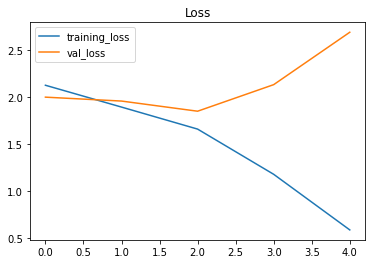

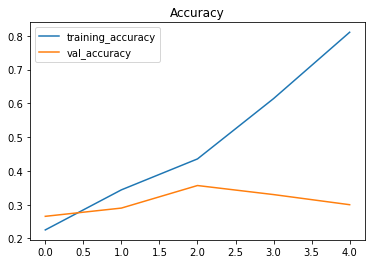

In [93]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

##What do these loss curves tell us?

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

## Adjust the model parameters
Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model.
 This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data.
One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. 

In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [94]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 218ms/step - loss: 2.4026 - accuracy: 0.2275 - val_loss: 1.9458 - val_accuracy: 0.3140
Epoch 2/5
235/235 [==============================] - 50s 214ms/step - loss: 1.8072 - accuracy: 0.3829 - val_loss: 1.9742 - val_accuracy: 0.3060
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.5302 - accuracy: 0.4897 - val_loss: 1.9479 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 1.1434 - accuracy: 0.6337 - val_loss: 2.1279 - val_accuracy: 0.3036
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.7556 - accuracy: 0.7653 - val_loss: 2.5165 - val_accuracy: 0.2988


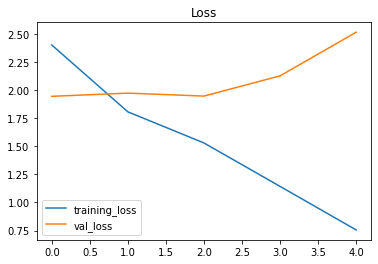

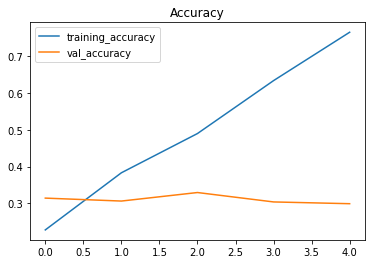

In [95]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about data augmentation?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images.

## Prepare data for data augmentation

In [96]:
# Data augmentation
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [97]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 532ms/step - loss: 2.1666 - accuracy: 0.2139 - val_loss: 1.9659 - val_accuracy: 0.3004
Epoch 2/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0433 - accuracy: 0.2739 - val_loss: 1.8946 - val_accuracy: 0.3472
Epoch 3/5
235/235 [==============================] - 123s 525ms/step - loss: 1.9941 - accuracy: 0.3032 - val_loss: 1.8769 - val_accuracy: 0.3536
Epoch 4/5
235/235 [==============================] - 123s 524ms/step - loss: 1.9529 - accuracy: 0.3245 - val_loss: 1.8546 - val_accuracy: 0.3516
Epoch 5/5
235/235 [==============================] - 124s 526ms/step - loss: 1.9208 - accuracy: 0.3341 - val_loss: 1.7642 - val_accuracy: 0.3892


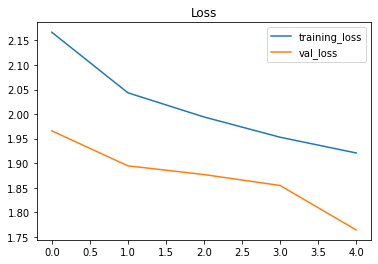

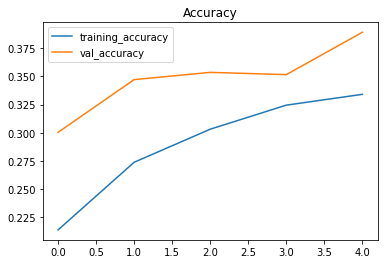

In [98]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

## 7. Repeat until satisfied
We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

## Making a prediction with our trained model
What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [99]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Beautiful, now let's get some of our custom images.

If you're using Google Colab, you could also upload some of your own images via the files tab.

In [100]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [102]:
# Reconfig pred and plot for multiclass images
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

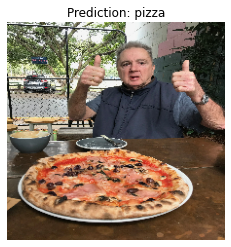

In [103]:
# Make a prediction using model_11
pred_and_plot(model = model_11, filename = "03-pizza-dad.jpeg",
              class_names = class_names)

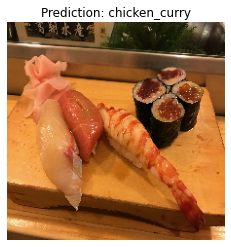

In [104]:
# Make another prediction
pred_and_plot(model = model_11, filename = "03-sushi.jpeg",
              class_names = class_names)

In [105]:
model_11.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.7642 - accuracy: 0.3892


[1.7641656398773193, 0.38920000195503235]

## Saving and loading our model

In [106]:
model_11.save("saved_training_model")

INFO:tensorflow:Assets written to: saved_training_model/assets


In [107]:
#Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_training_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.7642 - accuracy: 0.3892


[1.7641658782958984, 0.38920000195503235]

In [108]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.7642 - accuracy: 0.3892


[1.7641654014587402, 0.38920000195503235]

📖 Extra-curriculum¶
Watch: MIT's Introduction to Deep Computer Vision lecture. This will give you a great intuition behind convolutional neural networks.

Watch: Deep dive on mini-batch gradient descent by deeplearning.ai. If you're still curious about why we use batches to train models, this technical overview covers many of the reasons why.

Read: CS231n Convolutional Neural Networks for Visual Recognition class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing.

Read: "A guide to convolution arithmetic for deep learning". This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

Code practice: TensorFlow Data Augmentation Tutorial. For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.